In [1]:
# Bus Card Tap on time and count from 25/07/2016 to 31/07/2016

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

In [2]:
tap_on = pd.read_csv("tap_on_20160725-31.csv")
tap_on.sample(10)

,mode,date,tap,time,count
3415,ferry,20160727,off,09:15,368
4434,lightrail,20160727,off,10:00,273
2690,ferry,20160728,off,11:45,421
1356,bus,20160725,off,22:15,1876
4105,lightrail,20160731,off,11:30,563
4480,lightrail,20160725,on,15:30,709
1893,train,20160731,off,17:15,10807
3012,ferry,20160729,off,12:30,622
2358,train,20160727,off,09:00,31197
1895,train,20160731,off,15:30,8963


In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [4]:
tap_on.shape

(4602, 5)

In [5]:
tap_on.columns

Index(['mode', 'date', 'tap', 'time', 'count'], dtype='object')

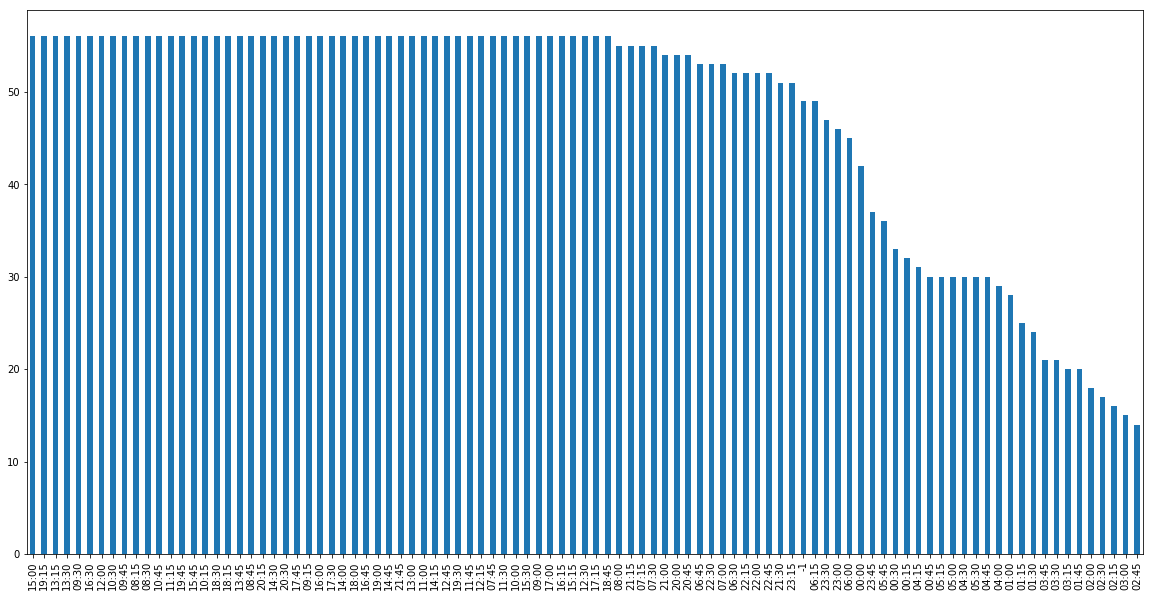

In [6]:
tap_on['time'].value_counts().plot(kind="bar")

In [7]:
time = tap_on['time']
count = tap_on['count']

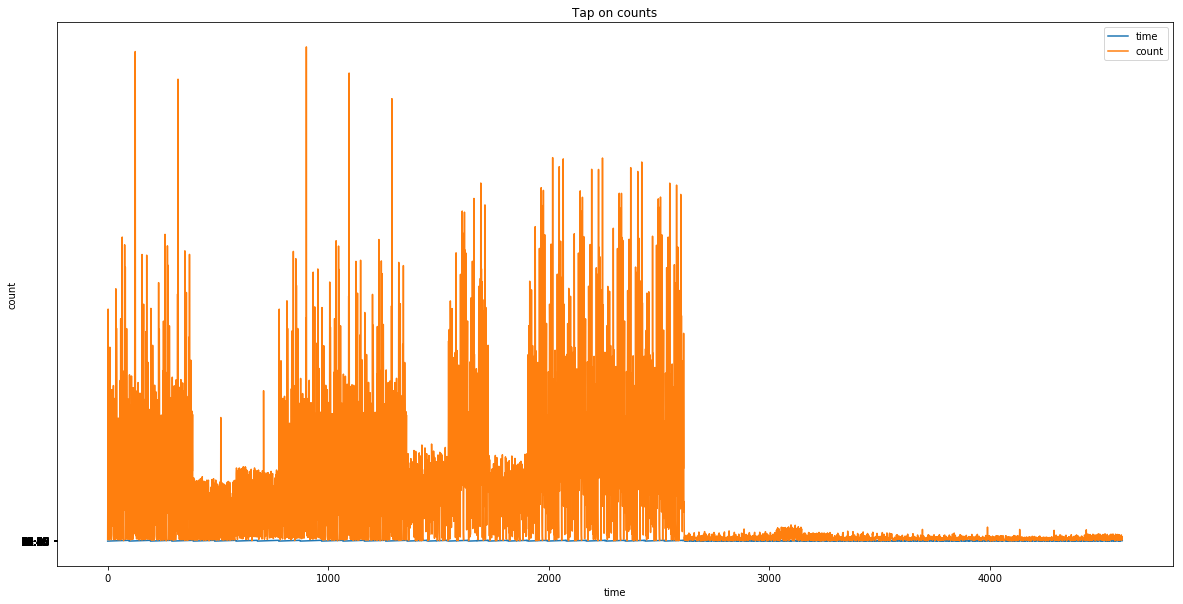

In [8]:
plt.plot(time, label='time')
plt.plot(count, label='count')
plt.title('Tap on counts')
plt.xlabel('time')
plt.ylabel('count')
plt.legend()

plt.show()

In [9]:
print (list(tap_on['time']))

['02:30', '13:30', '15:15', '12:45', '00:00', '16:30', '04:45', '03:45', '19:45', '01:30', '07:15', '09:00', '18:45', '11:30', '20:15', '00:15', '13:00', '02:45', '23:30', '17:45', '10:45', '05:15', '20:00', '12:30', '07:00', '14:15', '08:45', '23:45', '-1', '13:15', '11:45', '22:45', '05:00', '16:15', '01:15', '14:00', '21:15', '07:30', '06:30', '01:00', '15:00', '16:00', '23:15', '12:15', '21:00', '04:30', '05:30', '03:15', '14:30', '18:15', '06:45', '19:00', '12:00', '09:45', '23:00', '00:45', '04:00', '17:30', '10:15', '08:30', '03:00', '21:30', '15:45', '18:00', '20:30', '19:15', '08:00', '02:00', '13:45', '17:00', '09:30', '22:30', '04:15', '03:30', '10:00', '18:30', '20:45', '07:45', '06:00', '05:45', '08:15', '11:00', '02:15', '22:00', '17:15', '10:30', '15:30', '14:45', '00:30', '19:30', '06:15', '01:45', '16:45', '11:15', '09:15', '22:15', '21:45', '02:30', '13:30', '15:15', '12:45', '00:00', '16:30', '04:45', '03:45', '19:45', '01:30', '07:15', '09:00', '18:45', '11:30', '20

In [10]:


# def parse_time(row):
#     try:
#         new_t = datetime.strptime(row.time, "%H:%M")
# #         print(new_t)
#         return (new_t)
#     except Exception as e:
# #         print(t, e)
#         return None
        
    
# tap_on['dt'] = tap_on.apply(parse_time, axis=1)
# tap_on.sample(4)

In [11]:
# def parse_date(row):
#     try:
#         new_d = datetime.strptime(str(row.date), "%Y%m%d")
#         return(new_d)
#     except Exception as e:
#         print(row.date, e)
#         return None
        
    
# tap_on['dt_date'] = tap_on.apply(parse_date, axis=1)
# tap_on.sample(4)

In [12]:
d = datetime.strptime('Jul 28 2019', '%b %d %Y')
t = datetime.strptime('14:30', '%H:%M')
d, t
datetime(d.year,d.month,d.day,t.hour,t.minute)

datetime.datetime(2019, 7, 28, 14, 30)

In [13]:
def parse_time(row):
    try:
        new_t = datetime.strptime(row.time, "%H:%M")
        new_d = datetime.strptime(str(row.date), "%Y%m%d")
        dt = datetime(new_d.year,new_d.month,new_d.day,new_t.hour,new_t.minute)      
        return dt
    except Exception as e:
#         print(t, e)
        return None


tap_on["new_dt"] = tap_on.apply(parse_time, axis=1)
tap_on.sample(5)

,mode,date,tap,time,count,new_dt
3244,ferry,20160730,off,10:30,520,2016-07-30 10:30:00
3042,ferry,20160731,on,19:45,219,2016-07-31 19:45:00
1416,train,20160730,on,03:00,47,2016-07-30 03:00:00
3325,ferry,20160727,on,19:15,181,2016-07-27 19:15:00
326,bus,20160726,off,14:00,9868,2016-07-26 14:00:00


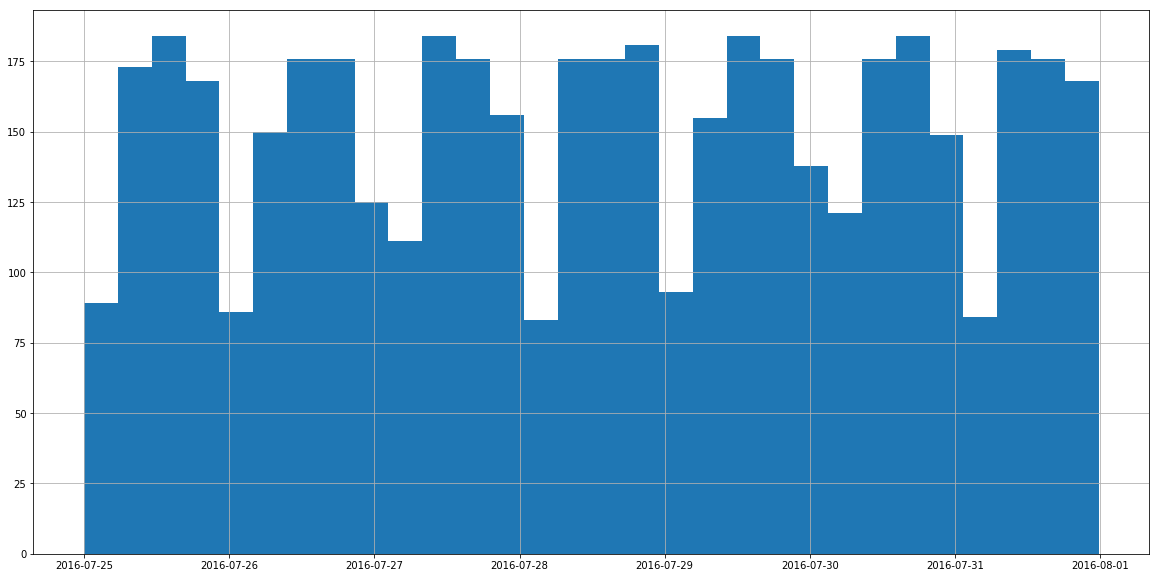

In [18]:
tap_on.new_dt.hist(bins=30)

In [20]:
def make_day(row):
    try:
        day = datetime.strftime(row.new_dt, "%A")
             
        return day
    except Exception as e:
#         print(t, e)
        return None


tap_on["day"] = tap_on.apply(make_day, axis=1)
tap_on.sample(5)

,mode,date,tap,time,count,new_dt,day
783,bus,20160729,on,03:45,167,2016-07-29 03:45:00,Friday
3426,ferry,20160727,off,08:15,1140,2016-07-27 08:15:00,Wednesday
1226,bus,20160725,on,15:45,20374,2016-07-25 15:45:00,Monday
2575,train,20160725,off,23:00,2474,2016-07-25 23:00:00,Monday
4138,lightrail,20160731,off,20:45,185,2016-07-31 20:45:00,Sunday


In [22]:
tap_on.groupby(["mode","day"]).sum()

date    count
mode      day                           
bus       Friday     3870859968  1731002
          Monday     3870859200  1755397
          Saturday   3870860160   855058
          Sunday     3870860352   661268
          Thursday   3870859776  1803935
          Tuesday    3870859392  1778378
          Wednesday  3870859584  1769102
ferry     Friday     2882984247    66350
          Monday     2580572800    51012
          Saturday   2762020010    66507
          Sunday     2358805527   102472
          Thursday   2741859008    59897
          Tuesday    2661215832    54602
          Wednesday  2721698145    54454
lightrail Friday     3044270079    53004
          Monday     3165233825    71417
          Saturday   3084591690    44161
          Sunday     2943466726    47605
          Thursday   2882984104    49820
          Tuesday    2882983818    52764
          Wednesday  2923305415    50234
train     Friday     3669252678  2360344
          Monday     3528126875  2264242
          Saturday   3709574320  1097144
          Sunday     3548288656   932746
          Thursday   3548288128  2381206
          Tuesday    3507966324  2325770
          Wednesday  3548287952  2333294